# Fase 2: Visualización

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?
3. ¿Cuál es la distribución de los clientes por provincia o estado?
4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [2]:
# Importar bibliotecas necesarias para el tratamiento de datos
# ---------------------------------------------------
import pandas as pd

# Bibliotecas de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Se establece el estilo del fondo de las gráficas oscuro
sns.set_style("dark")

# establece el estilo en Solarize_Lihgt2.
plt.style.use('dark_background')

In [4]:
df = pd.read_csv('../data/customers.csv', index_col=0)
df

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,...,education,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,salary
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,92552.00
1,100102,2017,1,10,4,14,2030,203.0,0,0,...,College,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,79666.88
2,100140,2017,1,6,0,6,1200,120.0,0,0,...,College,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,79666.88
3,100214,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,Married,Star,4170.57,Standard,2015,8,NaN,NaN,63253.00
4,100428,2017,1,6,0,6,606,60.0,0,0,...,Bachelor,Married,Aurora,5845.43,Standard,2012,8,NaN,NaN,63478.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176914,999524,2018,12,11,4,15,1500,150.0,0,0,...,College,Married,Aurora,14325.15,Standard,2015,5,NaN,NaN,79666.88
176915,999550,2018,12,15,0,15,2985,298.0,0,0,...,Doctor,Divorced,Star,13736.13,Standard,2014,8,NaN,NaN,125167.00
176916,999631,2018,12,11,1,12,2244,224.0,0,0,...,Bachelor,Divorced,Star,2572.51,Standard,2014,1,NaN,NaN,47349.00
176917,999758,2018,12,1,0,1,896,89.0,0,0,...,College,Single,Star,18690.34,Standard,2018,8,NaN,NaN,79666.88


1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

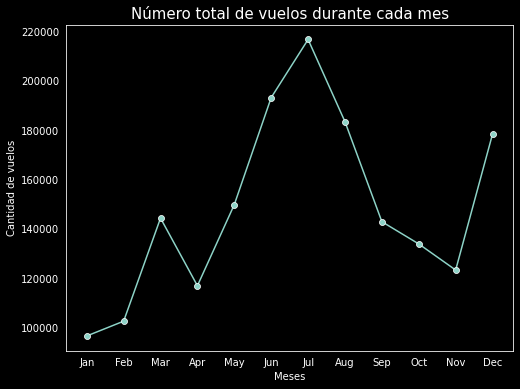

In [6]:
# Se crea una columna con los nombres de los meses en vez de los números para una mayor claridad en la gráfica 
df['mes'] = pd.to_datetime(df['month'], format='%m').dt.month_name().str.slice(stop=3)

# Se agrupa por mes para sumar los vuelos totales en los mismos meses y se ordena el dataframe por meses para ver la línea temporal más clara en la gráfica
df_x_mes = df.groupby('mes').sum().sort_values('month')

# Se hace la gráfica un poco más grande para verla mejor
plt.figure(figsize=(8, 6))

#Se realiza una gráfica de líneas para observar la variación en el tiempo
sns.lineplot(data=df_x_mes, 
            x='mes', 
            y='total_flights', 
            palette='flare', 
            marker='o')

# Etiquetas y título
plt.xlabel('Meses', fontsize=10)
plt.ylabel('Cantidad de vuelos', fontsize=10)
plt.title('Número total de vuelos durante cada mes', fontsize=15);

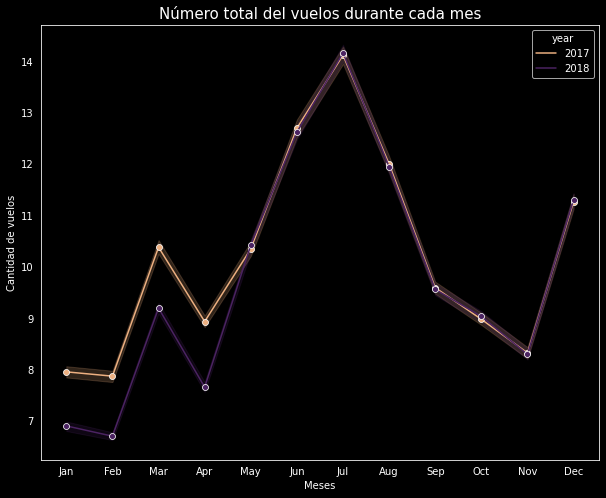

In [6]:
# Se ordena el dataframe por meses
df_ordenado_x_mes = df.sort_values('month')

# Se hace la gráfica un poco más grande para verla mejor
plt.figure(figsize=(10, 8))

#Se realiza una gráfica de líneas para observar la variación en el tiempo, separando los años de los vuelos
sns.lineplot(data=df_ordenado_x_mes, 
            x='mes', 
            y='total_flights',
            hue='year', 
            palette='flare', 
            marker='o')

# Etiquetas y título
plt.xlabel('Meses', fontsize=10)
plt.ylabel('Cantidad de vuelos', fontsize=10)
plt.title('Número total del vuelos durante cada mes', fontsize=15);

El pico más importante con diferencia sucede en verano (junio, julio y agosto) con el punto álgido en julio.
La seguiente época con más vuelos es en diciembre, probablemente coincidiendo con las festividades de Navidad.
Por último, se puede observar un tercer pico mucho menos en marzo, que podría coincidir con pascua.
Desde luego, enero y febrero son los meses en los que se vuela menos con una marcada diferencia.

Si separamos por años, se puede observar que en el primer trimestre del año 2017 se aumento ligeramente la cantidad de vuelos con respecto a 2018, pero las pautas son similares.

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

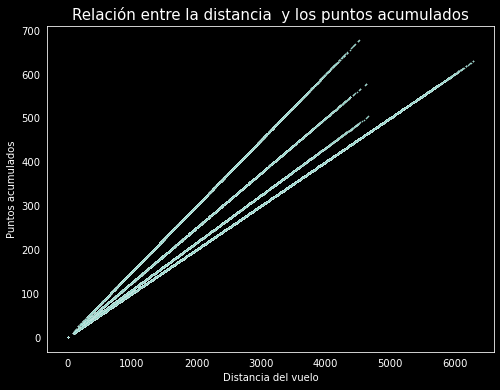

In [7]:
# Se hace una gráfica de dispersión para ver la relación entre dos variables numéricas

# la gráfica un poco más grande para verla mejor
plt.figure(figsize=(8, 6))

sns.scatterplot(x = "distance", 
            y = "points_accumulated", 
            data = df,
            markers='.',
            s=2,
            palette='flare')

# Etiquetas y título
plt.xlabel('Distancia del vuelo', fontsize=10)
plt.ylabel('Puntos acumulados', fontsize=10)
plt.title('Relación entre la distancia  y los puntos acumulados', fontsize=15);

Ha medida que aumenta la distancia de vuelo hay una relación positiva importante con los puntos que se acumulan.
Se puede observar claramente la relación lineal que hay entre distancia y puntos acumulados.

3. ¿Cuál es la distribución de los clientes por provincia o estado?

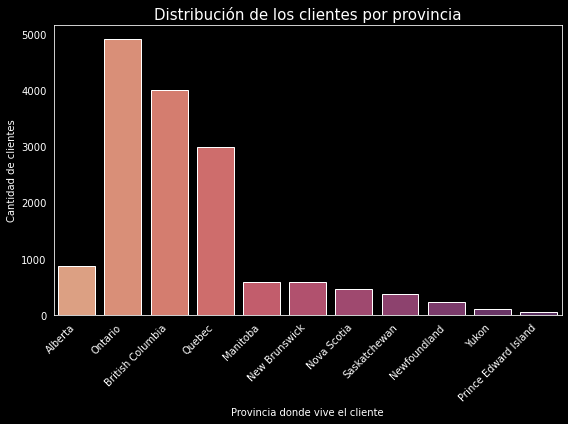

In [13]:
# Se crea un dataframe eliminando los duplicados en el número de targeta de fidelidad para unicamente tener en cuenta una vez a cada cliente
df_clientes_unicos = df.drop_duplicates(subset='loyalty_number')

# Se hace la gráfica un poco más grande para verla mejor
plt.figure(figsize=(8, 6))

#Se realiza un 'countplot' para contar el número de clientes en cada provincia
sns.countplot(x = "province", 
              data = df_clientes_unicos, 
              palette = "flare")

#rotamos el eje x para que se puedna leer las opciones
plt.xticks(rotation=45,  ha='right')

# Etiquetas y título
plt.xlabel('Provincia donde vive el cliente', fontsize=10)
plt.ylabel('Cantidad de clientes', fontsize=10)
plt.title('Distribución de los clientes por provincia', fontsize=15)
plt.tight_layout();

Hay una mayoría considerable de clientes en Ontario, British Columbia y Quebec, en ese orden con respecto al resto de provincias.

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

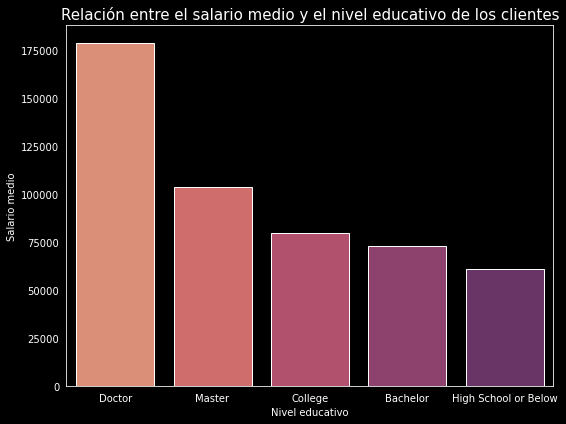

In [14]:
# Se crea un dataframe agrupando por nivel educativo para conseguir la media de lso salarios en cada uno de los niveles educativos
df_salario_x_educacion = df.groupby('education').mean().reset_index().sort_values('salary', ascending=False )

# Se hace la gráfica un poco más grande para verla mejor
plt.figure(figsize=(8, 6))

# Se realiza un barplot para poder ver la relación entre nivel educativo que es una variable categorica y salario que es una variable numérica
sns.barplot(x = "education", 
            y = "salary", 
            data = df_salario_x_educacion,
            palette = "flare")

# Etiquetas y título
plt.xlabel('Nivel educativo', fontsize=10)
plt.ylabel('Salario medio', fontsize=10)
plt.title('Relación entre el salario medio y el nivel educativo de los clientes', fontsize=15)
plt.tight_layout();

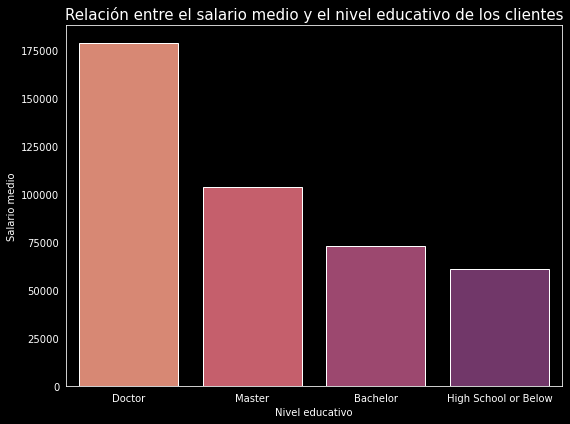

In [16]:
# Se crea un dataframe agrupando por nivel educativo para conseguir la media de lso salarios en cada uno de los niveles educativos
df_salario_educacion = df[df['education'] != "College"]
df_salario_x_educacion = df_salario_educacion.groupby('education').mean().reset_index().sort_values('salary', ascending=False )

# Se hace la gráfica un poco más grande para verla mejor
plt.figure(figsize=(8, 6))

# Se realiza un barplot para poder ver la relación entre nivel educativo que es una variable categorica y salario que es una variable numérica
sns.barplot(x = "education", 
            y = "salary", 
            data = df_salario_x_educacion,
            palette = "flare")

# Etiquetas y título
plt.xlabel('Nivel educativo', fontsize=10)
plt.ylabel('Salario medio', fontsize=10)
plt.title('Relación entre el salario medio y el nivel educativo de los clientes', fontsize=15)
plt.tight_layout();

Hay una difrencia considerable entre los salarios medios de los doctorados y el resto. Los clientes con un master, tambien tienden a tener un salario medio mayor. Los clientes solamente con graduado escolar o inferior sí son aquellos que tienen un salario medio inferior al resto.

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

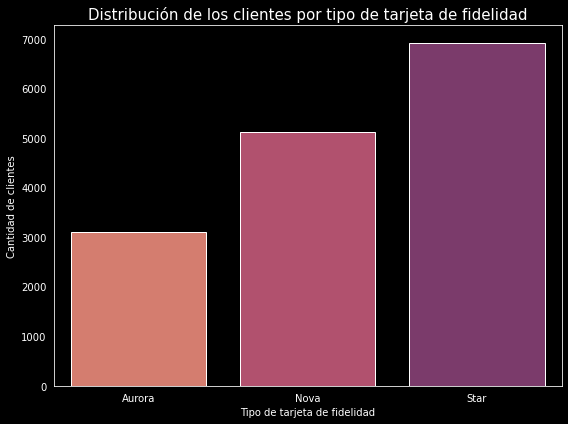

In [11]:
# Se hace la gráfica un poco más grande para verla mejor
plt.figure(figsize=(8, 6))

#Se realiza un 'countplot' para contar el número de clientes en cada provincia
sns.countplot(x = "loyalty_card", 
              data = df_clientes_unicos, 
              palette = "flare")

# Etiquetas y título
plt.xlabel('Tipo de tarjeta de fidelidad', fontsize=10)
plt.ylabel('Cantidad de clientes', fontsize=10)
plt.title('Distribución de los clientes por tipo de tarjeta de fidelidad', fontsize=15)
plt.tight_layout();

Mayoritariamente los clientes tienen la tarjeta Star, luego en menor medida la Nova y la tarjeta que menos clientes tienen es la Aurora con bastante difeerencia 

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

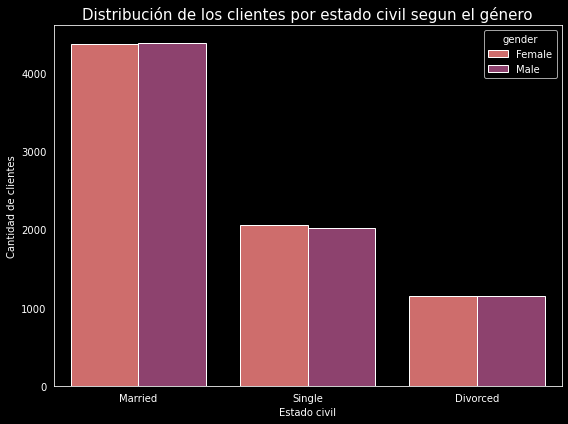

In [12]:
# Se hace la gráfica un poco más grande para verla mejor
plt.figure(figsize=(8, 6))

#Se realiza un 'countplot' para contar el número de clientes en cada provincia
sns.countplot(x = "marital_status",
              hue='gender' ,
              data = df_clientes_unicos, 
              palette = "flare")

# Etiquetas y título
plt.xlabel('Estado civil', fontsize=10)
plt.ylabel('Cantidad de clientes', fontsize=10)
plt.title('Distribución de los clientes por estado civil segun el género', fontsize=15)
plt.tight_layout();

Hay una mayoría considerable de clientes casados, en mucha menor medida, solteros y relativamente pocos divorciados, aún así no parecen observarse diferencias por género.